# Linear Regression Noisy_Bowl

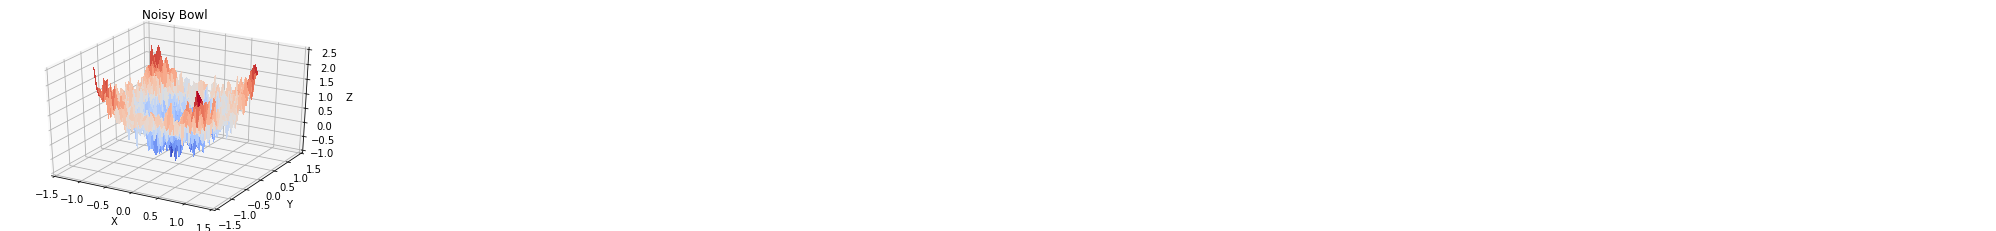

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.image import cm


np.random.seed(1)
    
x = np.arange(-1, 1, 0.05)
y = np.arange(-1, 1, 0.05)
x_grid, y_grid = np.meshgrid(x, y)
    
z_grid = x_grid**2 + y_grid**2 + 0.3 * np.random.normal(0, 1, x_grid.shape)

fig = plt.figure()
    
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html
# Get the current Axes instance on the current figure 
# matching the given keyword args, or create one
ax = fig.gca(projection='3d') # projection='3d' need from mpl_toolkits.mplot3d import Axes3D
ax.plot_surface(x_grid, y_grid, z_grid, rstride=1, cstride=1, \
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title('Noisy Bowl')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.0, 2.5])

plt.show()

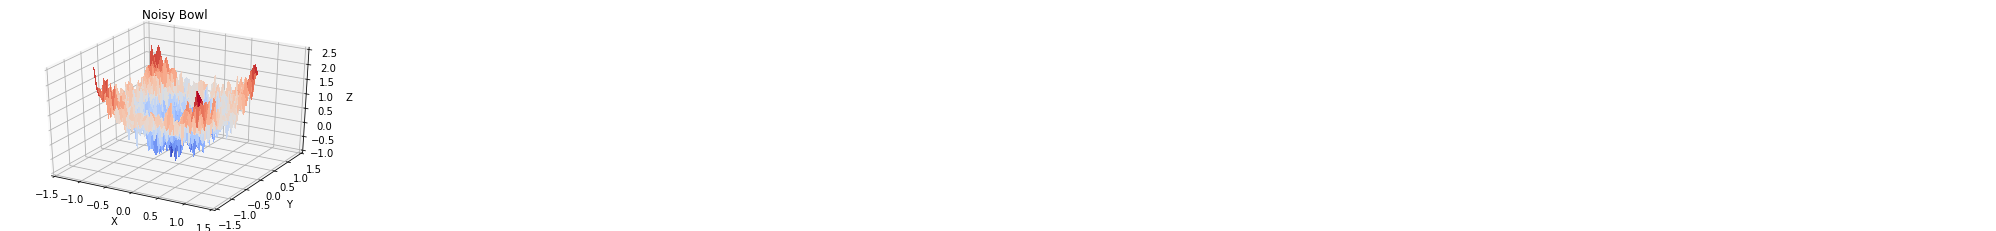

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import cm
from mpl_toolkits.mplot3d import Axes3D


def load_noisy_bowl():
    np.random.seed(1)
    
    x = np.arange(-1, 1, 0.05)
    y = np.arange(-1, 1, 0.05)
    x_grid, y_grid = np.meshgrid(x, y)
    
    z_grid = x_grid**2 + y_grid**2 + 0.3 * np.random.normal(0, 1, x_grid.shape)

    x = x_grid.reshape([-1, 1]).astype(np.float32)
    y = y_grid.reshape([-1, 1]).astype(np.float32)
    z = z_grid.reshape([-1, 1]).astype(np.float32)

    return x, y, z


x, y, z = load_noisy_bowl()
x_grid = x.reshape(40, 40)
y_grid = y.reshape(40, 40)
z_grid = z.reshape(40, 40)

fig = plt.figure()
    
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.gca.html
# Get the current Axes instance on the current figure 
# matching the given keyword args, or create one
ax = fig.gca(projection='3d') # projection='3d' need from mpl_toolkits.mplot3d import Axes3D
ax.plot_surface(x_grid, y_grid, z_grid, rstride=1, cstride=1, \
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_title('Noisy Bowl')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.0, 2.5])

plt.show()

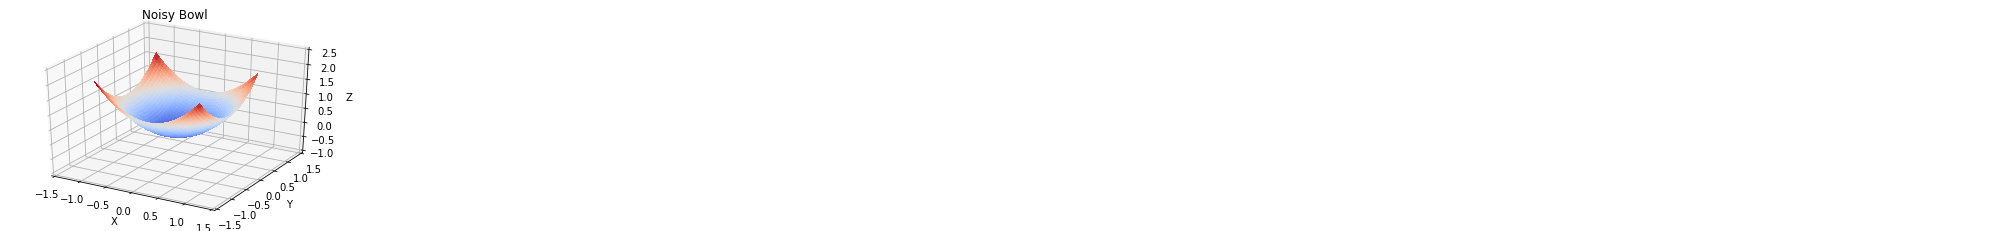

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.image import imread, cm
from mpl_toolkits.mplot3d import Axes3D

# this line should be commented out for regular python run 
%matplotlib inline  
# this line should be commented out for regular python run 


""" Hyperparameter """
data_size = 1600
batch_size = 100
lr = 1e-2
epoch = 1000


""" Data Generation """
def load_noisy_bowl():
    np.random.seed(1)
    
    x = np.arange(-1, 1, 0.05)
    y = np.arange(-1, 1, 0.05)
    x_grid, y_grid = np.meshgrid(x, y)
    
    z_grid = x_grid**2 + y_grid**2 + 0.3 * np.random.normal(0, 1, x_grid.shape)

    x = x_grid.reshape((-1, 1)).astype(np.float32)
    y = y_grid.reshape((-1, 1)).astype(np.float32)
    z = z_grid.reshape((-1, 1)).astype(np.float32)

    return x, y, z

data_x, data_y, data_z = load_noisy_bowl()

data_xx = data_x**2
data_xy = data_x * data_y
data_yy = data_y**2

x_data = np.hstack([data_x, data_y, data_xx, data_xy, data_yy])
y_data = data_z


""" Graph Construction """
tf.random.set_random_seed(337)

# placeholders
x = tf.placeholder(tf.float32, shape=(None, 5), name='x') # (None, 5)
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

# weights
W = tf.get_variable("W", shape=(5, 1), \
        initializer=tf.contrib.layers.variance_scaling_initializer(mode="FAN_AVG"))
b = tf.get_variable("b", shape=(), \
        initializer=tf.constant_initializer(0.0))

# prediction
y_pred = (x @ W) + b # (None, 1)

# cost
cost = tf.nn.l2_loss(y - y_pred)

# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)


""" Train """
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    # run gradient descent
    for i in range(epoch):
        idx = np.random.permutation(np.arange(data_size)) 
        x_batch = x_data[idx]
        y_batch = y_data[idx]
        for batch_number in range(int(data_size/batch_size)): 
            x_b = x_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            y_b = y_batch[batch_number*batch_size:(batch_number+1)*batch_size]
            feed_dict = {x: x_b, y: y_b}
            _, cost_now = sess.run([train_op, cost], feed_dict=feed_dict)
            #print(cost_now)

    # compute outputs of linear regression given x_data
    # y_now = sess.run(y_pred, feed_dict={x: x_data})
    y_now = np.empty_like(y_data)
    for batch_number in range(int(data_size/batch_size)):
        x_b = x_data[batch_number*batch_size:(batch_number+1)*batch_size]
        feed_dict = {x: x_b}
        y_temp = sess.run(y_pred, feed_dict=feed_dict)
        y_now[batch_number*batch_size:(batch_number+1)*batch_size] = y_temp
        
    x_grid = data_x.reshape(40, 40)
    y_grid = data_y.reshape(40, 40)
    z_grid = y_now.reshape(40, 40)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x_grid, y_grid, z_grid, rstride=1, cstride=1,
                    cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_title('Noisy Bowl')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.0, 2.5])
    plt.show()